In [194]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.lines as mlines

def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

In [87]:
def fitness1(x,y):
    return -np.abs(np.sin(x)*np.cos(y)*np.exp(abs(1-(np.sqrt(x**2+y**2)/math.pi))))
def fitness2(x,y):
    return 0.5+(np.cos(np.sin(np.abs(x**2-y**2)))**2-0.5)/((1+0.001*(x**2+y**2))**2)

w=0.9,c1,c2

In [31]:
x1 = np.linspace(-10, 10, 1000)
y1 = np.linspace(-10, 10, 1000)

X1, Y1 = np.meshgrid(x1, y1)
Z1 = fitness1(X1, Y1)

x2 = np.linspace(-100, 100, 1000)
y2 = np.linspace(-100, 100, 1000)

X2, Y2 = np.meshgrid(x2, y2)
Z2 = fitness2(X2, Y2)



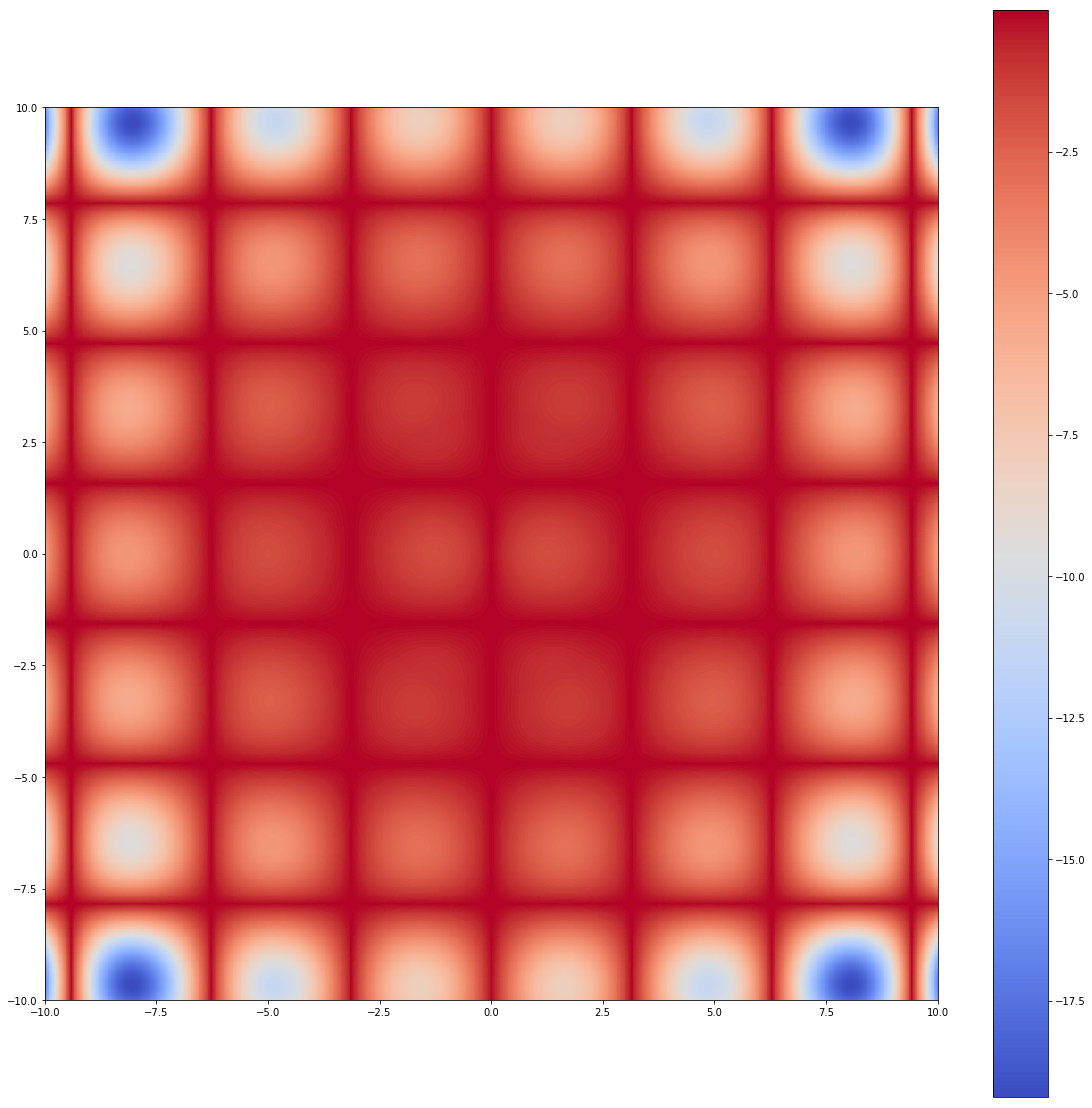

In [63]:
plt.figure(figsize=(20,20))
plt.imshow(Z1, extent=[-10, 10, -10, 10], origin='lower',cmap='coolwarm')
plt.colorbar()
plt.axis(aspect='image');

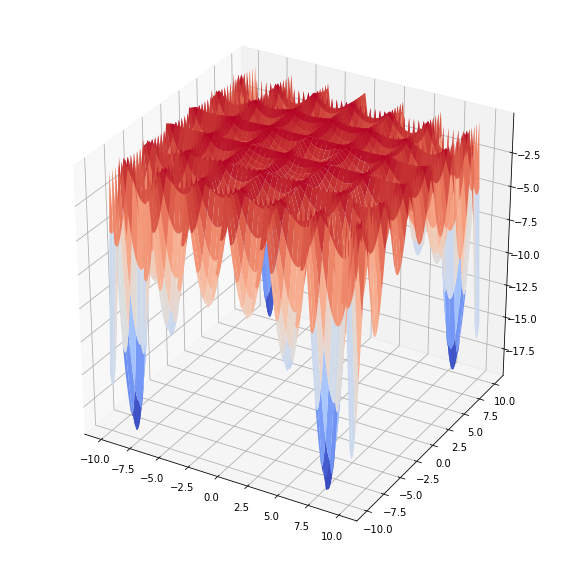

In [70]:
fig = plt.figure(figsize=(10,10))
ax = ax = fig.gca(projection='3d')

# Plot the surface
ax.plot_surface(X1, Y1, Z1, cmap='coolwarm',linewidth=0)

plt.show()

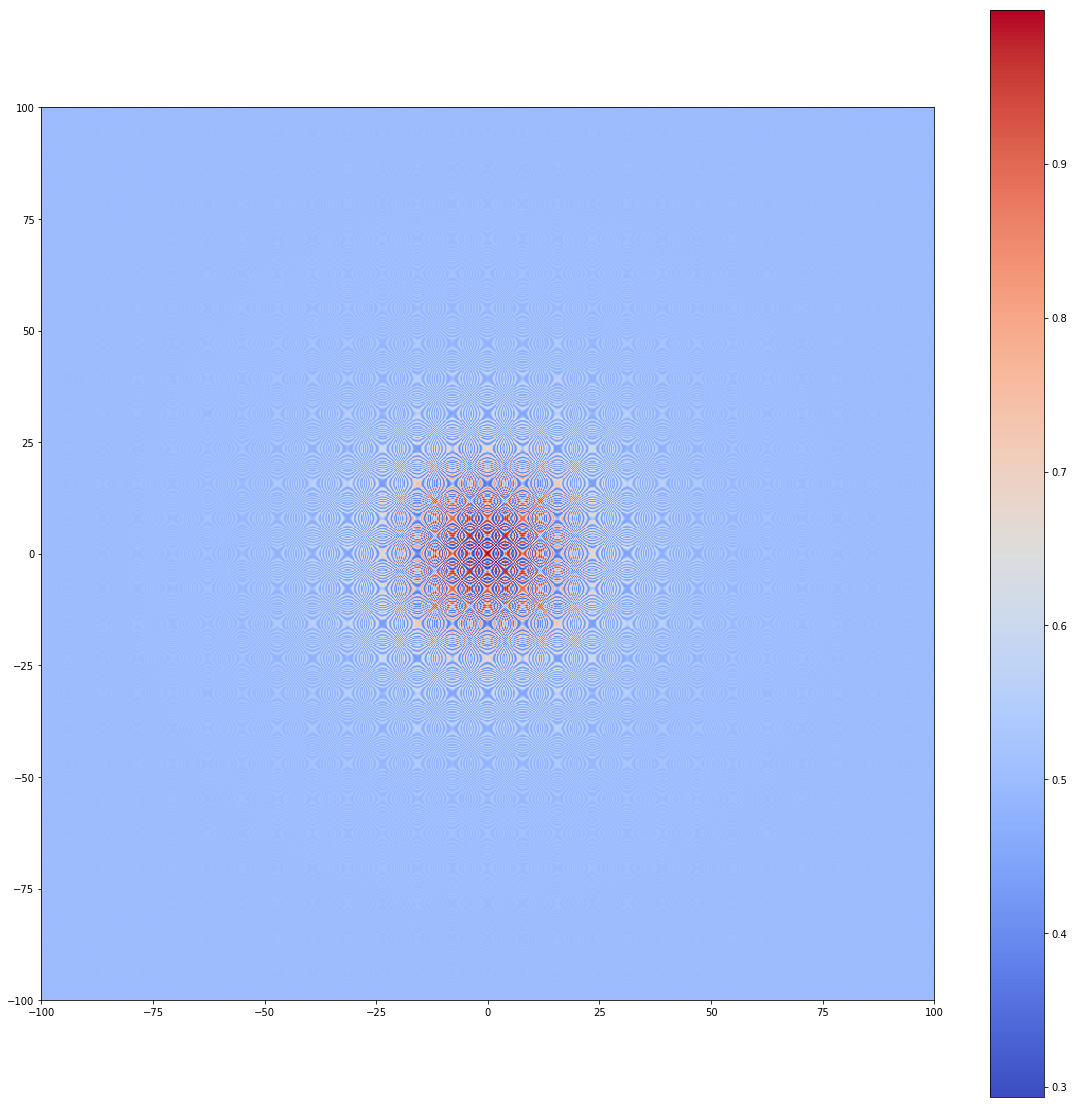

In [73]:
plt.figure(figsize=(20,20))
plt.imshow(Z2, extent=[-100, 100, -100, 100], origin='lower',cmap='coolwarm')
plt.colorbar()
plt.axis(aspect='image');

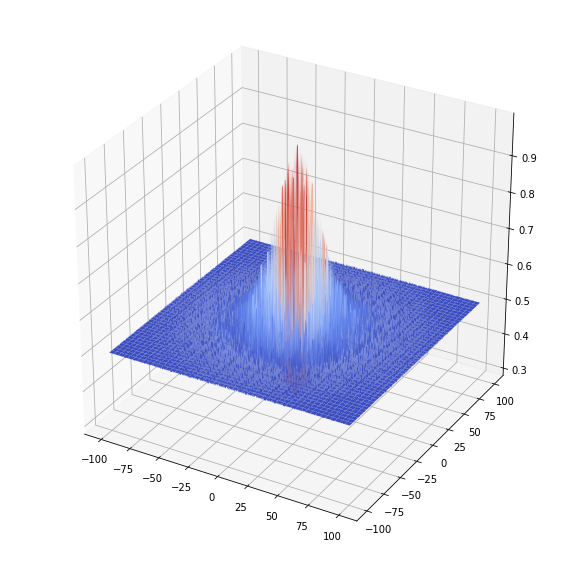

In [74]:
fig = plt.figure(figsize=(10,10))
ax = ax = fig.gca(projection='3d')

# Plot the surface
ax.plot_surface(X2, Y2, Z2, cmap='coolwarm',linewidth=0)

plt.show()

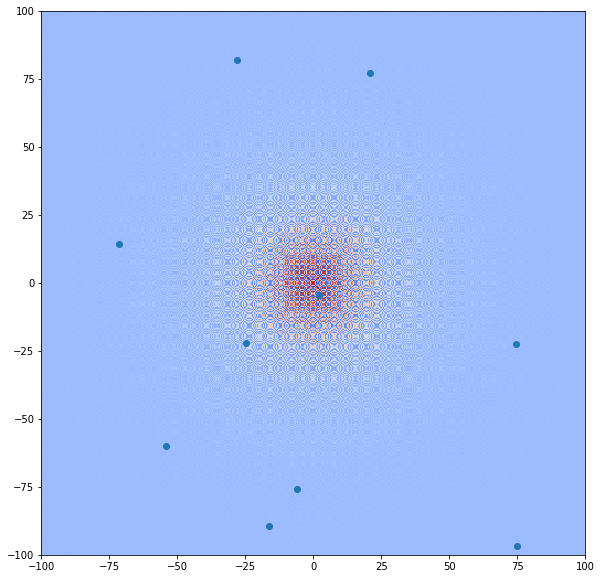

In [255]:
numberOfParticles=10
func=fitness2
upperBound=100
lowerBound=-100
w=0.2
c1=0.7
c2=0.3


PL=np.random.rand(numberOfParticles,2)*(upperBound-lowerBound)-upperBound
PV=np.zeros((numberOfParticles,2))

PBests=PL
LowerBound=np.array([lowerBound]*numberOfParticles)
UpperBound=np.array([upperBound]*numberOfParticles)


x = np.linspace(lowerBound, upperBound, 1000)
y = np.linspace(lowerBound, upperBound, 1000)

X, Y = np.meshgrid(x, y)
Z = func(X, Y)


plt.figure(figsize=(10,10))
plt.imshow(Z, extent=[lowerBound, upperBound, lowerBound, upperBound], origin='lower',cmap='coolwarm')
plt.scatter(PL.T[0],PL.T[1])
plt.axis(aspect='image');

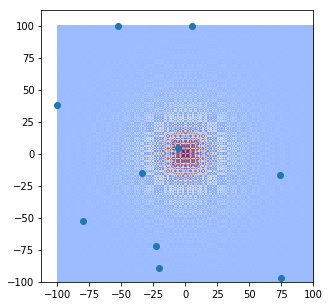

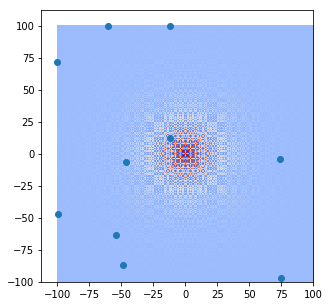

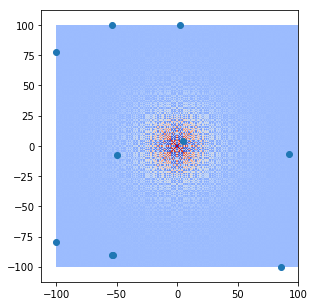

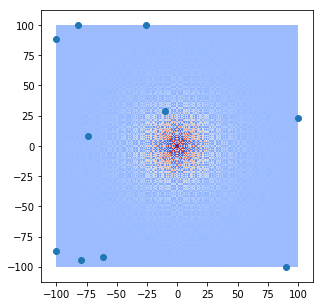

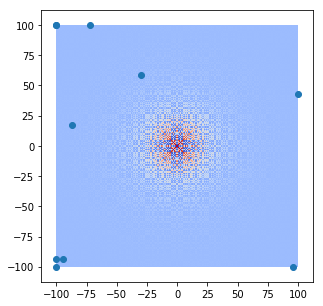

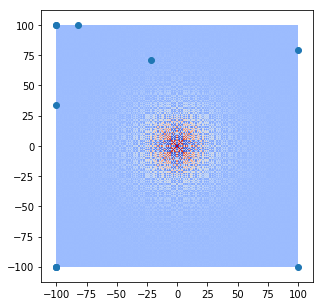

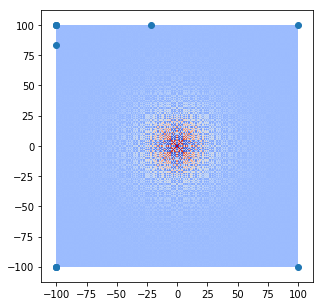

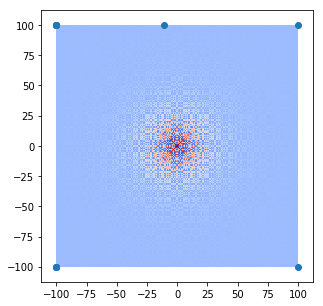

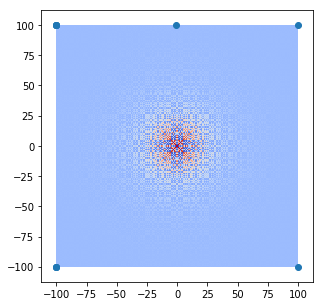

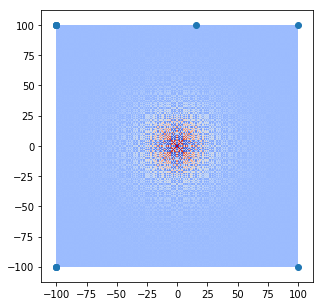

In [256]:
for i in range(10):
    PBests=np.array([pBest.tolist() if func(pBest[0],pBest[1])<func(pL[0],pL[1]) else pL.tolist() for (pBest,pL) in zip(PBests,PL)])
    gBest=PL[fitness1(PL.T[0],PL.T[1]).argmin()]
    PV=[w*pV+c1*np.random.rand()*(pL-pBest)+c2*np.random.rand()*(pL-gBest) for pV,pL,pBest in zip(PV,PL,PBests)]
    
    PL+=PV
    PL.T[0]=np.maximum(np.minimum(PL.T[0],UpperBound),LowerBound)
    PL.T[1]=np.maximum(np.minimum(PL.T[1],UpperBound),LowerBound)


    plt.figure(figsize=(5,5))
    plt.imshow(Z, extent=[lowerBound, upperBound, lowerBound, upperBound], origin='lower',cmap='coolwarm')
    plt.scatter(PL.T[0],PL.T[1])
    plt.axis(aspect='image');


In [240]:
np.random.rand()

0.4819557608528794